In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import os
import zipfile
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
import cv2

### Importing all the 5 classes of animal samples

In [10]:
train_butterfly_dir = os.path.join(r'G:/MS sem 2/Tensorflow/animals/raw-img/training/butterfly')
train_cat_dir = os.path.join(r'G:/MS sem 2/Tensorflow/animals/raw-img/training/cat')
train_dog_dir = os.path.join(r'G:/MS sem 2/Tensorflow/animals/raw-img/training/dog')
train_cow_dir = os.path.join(r'G:/MS sem 2/Tensorflow/animals/raw-img/training/cow')
train_elephant_dir = os.path.join(r'G:/MS sem 2/Tensorflow/animals/raw-img/training/elephant')

In [11]:
train_dog = os.listdir(train_dog_dir)
train_elephant = os.listdir(train_elephant_dir)
train_butterfly = os.listdir(train_butterfly_dir)
train_cat = os.listdir(train_cat_dir)
train_cow = os.listdir(train_cow_dir)

print (train_dog[:10])

['OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg', 'OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg', 'OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg', 'OIP---_cJbI6Ei26w5bW1urHewHaCf.jpeg', 'OIP--0C2kq6I68beB3DduLoxMgHaEf.jpeg', 'OIP--0CZnfLuBERVtzRm2QbB3gHaK4.jpeg', 'OIP--1QXriWyOTJg-9fEwbznmgHaI4.jpeg', 'OIP--2uTtzjaszBfEMCROuLN3wHaLH.jpeg', 'OIP--2z_zAuTMzgYM_KynUl9CQHaE7.jpeg', 'OIP--565fkAJy3DoFs81C9uE1QHaEY.jpeg']


### Finding number of training samples for each kind of animal

In [17]:
directory = r'G:/MS sem 2/Tensorflow/animals/raw-img/training'

print ('The number of training samples for each class:\n')
for file_name in os.listdir(directory): 
    print ('Size of the training samples for the class', file_name, ':', len(os.listdir(directory + '/' + file_name)))
    
validation_directory = r'G:/MS sem 2/Tensorflow/animals/raw-img/validation'

print ('\n\nThe number of validation samples for each class:\n')
for file_name in os.listdir(directory): 
    print ('Size of the validation samples for the class', file_name, ':', len(os.listdir(validation_directory + '/' + file_name)))


The number of training samples for each class:

Size of the training samples for the class butterfly : 1500
Size of the training samples for the class cat : 1452
Size of the training samples for the class cow : 1536
Size of the training samples for the class dog : 1500
Size of the training samples for the class elephant : 996


The number of validation samples for each class:

Size of the validation samples for the class butterfly : 480
Size of the validation samples for the class cat : 489
Size of the validation samples for the class cow : 503
Size of the validation samples for the class dog : 480
Size of the validation samples for the class elephant : 487


### Displaying the sample images

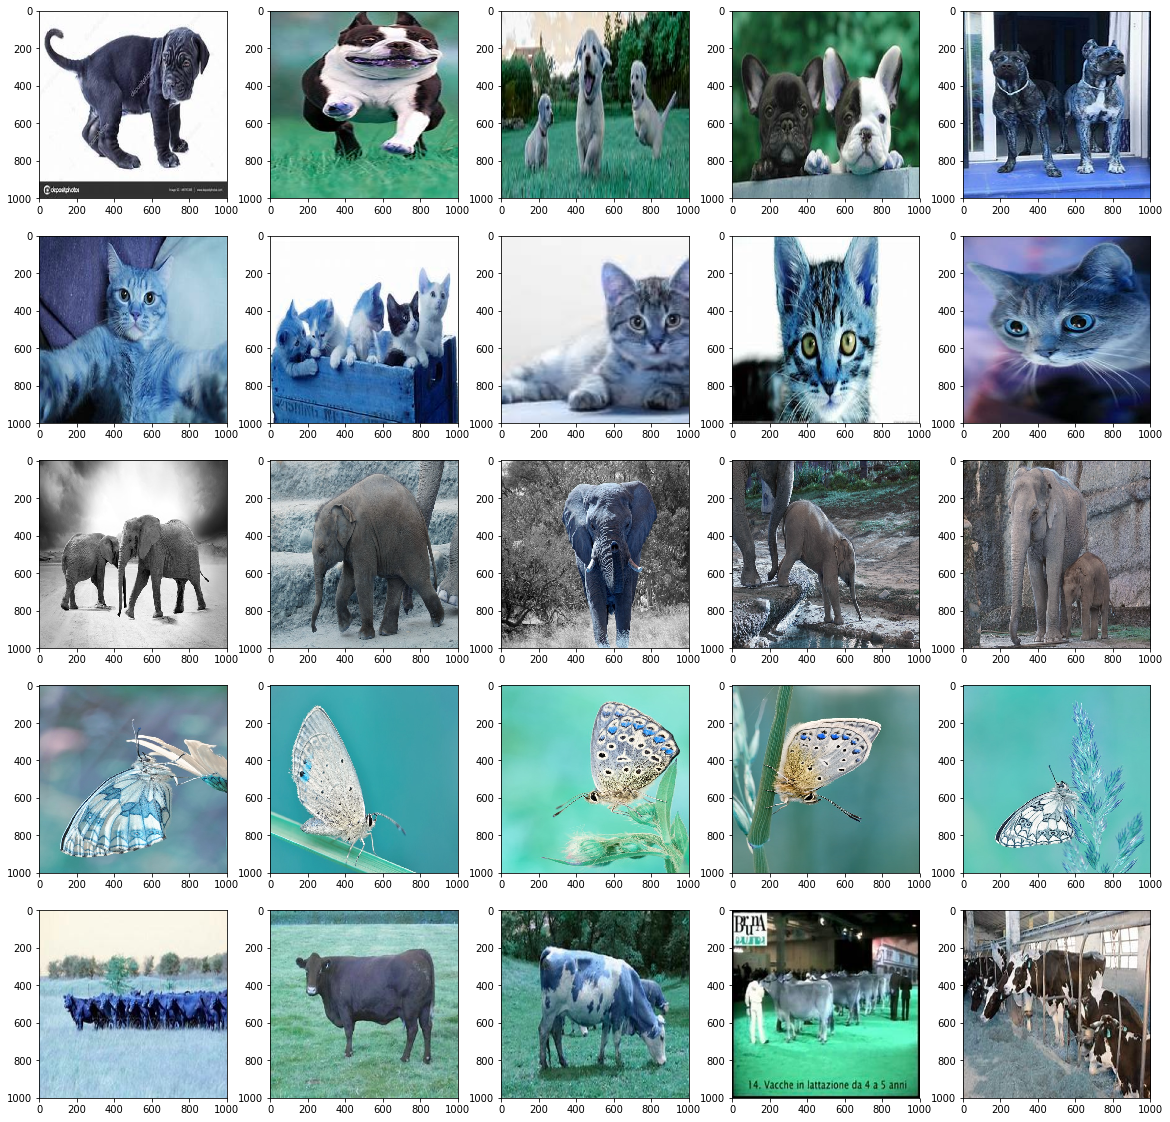

In [59]:
directory = r'G:/MS sem 2/Tensorflow/animals/raw-img/training/'

categories = {0:'dog', 1:'cat', 2:'elephant', 3:'butterfly', 4:'cow'}
training_data = []
training_label = []

for key, value in categories.items():
    cnt = 0
    path = os.path.join(directory + value)
    for img in os.listdir(path):
        if (cnt >= 5 and value != 'dog'):
            break
        elif (cnt >= 6 and value == 'dog'):
            break
        img_array = cv2.imread(os.path.join(path,img))
        resize_array = cv2.resize(img_array, (1000,1000))
        img_label = key
        training_data.append(resize_array)
        training_label.append(img_label)
        cnt += 1

        

w=5
h=5
fig=plt.figure(figsize=(20,20))
columns = 5
rows = 5
for i in range(1, columns*rows+1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(training_data[i])
plt.show()

### Training

In [2]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(5, activation='softmax')
])


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        36928     
__________

In [4]:
# RMSprop(lr=0.001)

opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics=['acc'])

In [5]:
# All images will be rescaled by 1./255

train_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_datagen = ImageDataGenerator(rescale = 1/255.0)




# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        r'G:/MS sem 2/Tensorflow/animals/raw-img/training',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        class_mode='sparse',
        classes = ['dog','elephant','cow','butterfly','cat'],
        shuffle =  True
        )

validation_generator = validation_datagen.flow_from_directory(
          r'G:/MS sem 2/Tensorflow/animals/raw-img/validation',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=64,
        class_mode='sparse',
        classes = ['dog','elephant','cow','butterfly','cat'],
        shuffle =  True
        )

Found 6984 images belonging to 5 classes.
Found 2439 images belonging to 5 classes.


In [6]:
history = model.fit_generator(
                              train_generator, 
                              steps_per_epoch=8,  
                              epochs=30,
                              verbose=1,
                              validation_data = validation_generator,
                              validation_steps=8
                             )

Epoch 1/30
8/8 [==============================] - 182s 23s/step - loss: 1.5763 - acc: 0.2578 - val_loss: 1.4875 - val_acc: 0.3750
Epoch 2/30
8/8 [==============================] - 156s 20s/step - loss: 1.3960 - acc: 0.4102 - val_loss: 1.4542 - val_acc: 0.4277
Epoch 3/30
8/8 [==============================] - 48s 6s/step - loss: 1.3413 - acc: 0.4160 - val_loss: 1.3708 - val_acc: 0.3867
Epoch 4/30
8/8 [==============================] - 48s 6s/step - loss: 1.2708 - acc: 0.4854 - val_loss: 1.2096 - val_acc: 0.4824
Epoch 5/30
8/8 [==============================] - 48s 6s/step - loss: 1.2121 - acc: 0.5146 - val_loss: 1.2057 - val_acc: 0.5059
Epoch 6/30
8/8 [==============================] - 47s 6s/step - loss: 1.1749 - acc: 0.5142 - val_loss: 1.2493 - val_acc: 0.4473
Epoch 7/30
8/8 [==============================] - 51s 6s/step - loss: 1.1541 - acc: 0.5156 - val_loss: 1.1483 - val_acc: 0.5098
Epoch 8/30
8/8 [==============================] - 52s 7s/step - loss: 1.0755 - acc: 0.5605 - val_los

### Visualization of the intermediate results between each layers

C:\Users\MANOJHUILGOLP\Anaconda3\envs\virtualtensorflow\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


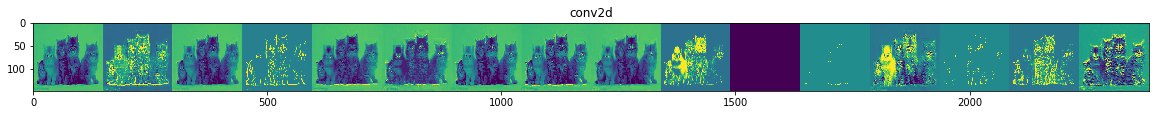

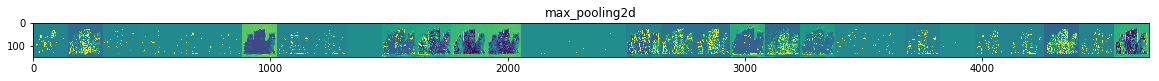

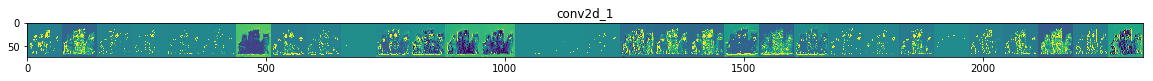

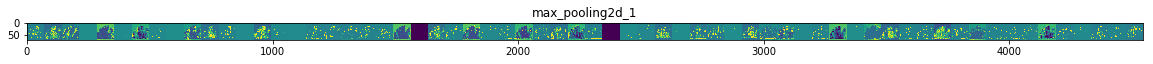

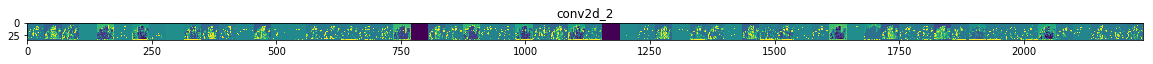

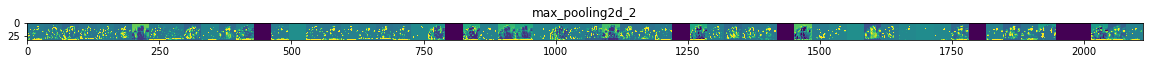

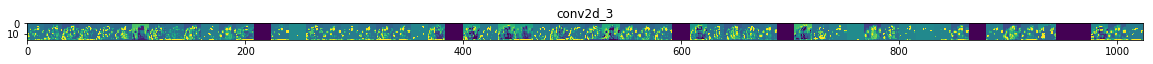

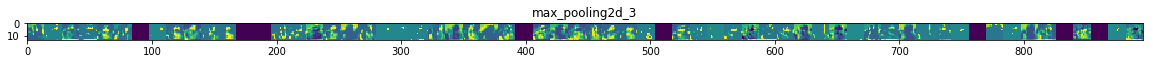

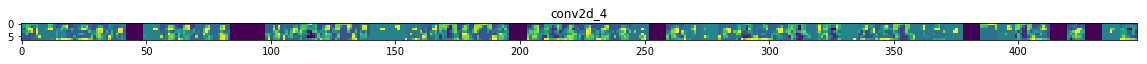

In [18]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

rcParams['figure.figsize'] = 20,11

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
butterfly_img_files = [os.path.join(train_butterfly_dir, f) for f in train_butterfly]
cat_img_files = [os.path.join(train_cat_dir, f) for f in train_cat]
img_path = np.random.choice(butterfly_img_files + cat_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Visualization of the results - Loss and Accuracy

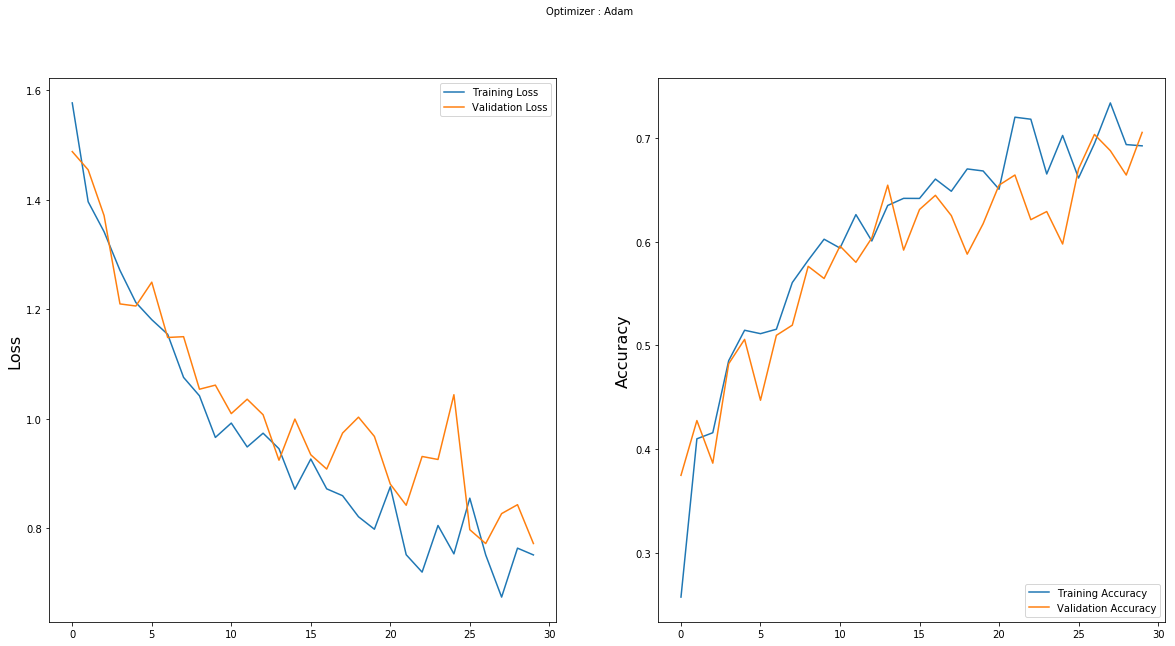

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()